In [1]:
import pandas as pd #tells python to bring pandas data analysis library into current environment using pd alias
import seaborn as sns #bring Seaborn library into current environment using sns alias
import matplotlib.pyplot as plt #library similar to MATLAB used for figures and plotting
%matplotlib inline 
from sklearn.model_selection import train_test_split #split the arrays or matrices into random train and test subsets
from sklearn.linear_model import LinearRegression #implements linear regression 
from sklearn import metrics #sklearn metrics module implements several loss, score and utility functions to measure classification
from statsmodels.api import OLS #Python module providing classes and functions for statistical methods using OLS method of linear regression
import os.path #path module for operating system
from google.colab import files #uploading from local file system

In [2]:

if os.path.isfile("Computers.csv"): #check path whether the specified path is existing regular file or not 
  file_name = "Computers.csv" 
  computers_data = pd.read_csv(file_name) #loading the CSV into the DataFrame
elif os.path.isfile("archive.zip"):
  file_name = "archive.zip" 
  computers_data = pd.read_csv(file_name) #loading the CSV into the DataFrame
else:
  uploaded = files.upload() 
  computers_data = pd.read_csv(next(iter(uploaded)))
computers_data.info()

Saving Computers.csv to Computers.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [3]:
computers_data.describe() #provides the description of the data in the DataFrame

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [4]:
computers_data.info() #provides concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [5]:
computers_data.head(10) #returns the first 10 rows 

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
5,6,3695,66,340,16,14,no,no,yes,94,1
6,7,1720,25,170,4,14,yes,no,yes,94,1
7,8,1995,50,85,2,14,no,no,yes,94,1
8,9,2225,50,210,8,14,no,no,yes,94,1
9,10,2575,50,210,4,15,no,no,yes,94,1


In [6]:
computers_data.shape #returns the shape of the DataFrame. The Dataframe is made up of 6259 rows and 11 columns of data

(6259, 11)

In [7]:
computers_data.isnull().sum().sum() #returns number of missing values in the dataset

0

In [8]:
computers_data['price'][:10] #display price of the first 10 elements

0    1499
1    1795
2    1595
3    1849
4    3295
5    3695
6    1720
7    1995
8    2225
9    2575
Name: price, dtype: int64

In [9]:
if 'Unnamed: 0' in computers_data.columns: #the first column is being treated as the first column and not the index, so in order to remove this it needs to be dropped
  computers_data = computers_data.drop('Unnamed: 0', axis=1)
computers_data.head(10)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
5,3695,66,340,16,14,no,no,yes,94,1
6,1720,25,170,4,14,yes,no,yes,94,1
7,1995,50,85,2,14,no,no,yes,94,1
8,2225,50,210,8,14,no,no,yes,94,1
9,2575,50,210,4,15,no,no,yes,94,1


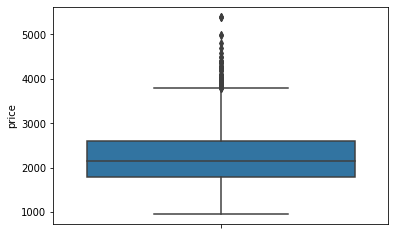

In [10]:
sns.boxplot(y=computers_data['price']) #draws a box plot to show distributions with respect to y-axis price values in computers_data csv

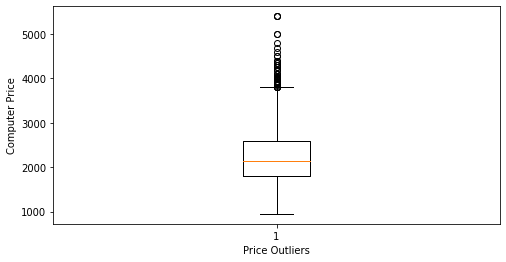

In [11]:
fig, ax = plt.subplots(figsize=(8,4)) #fig and ax are the variables that take on the tuple values from plt.subplots() which contains the figure and axes objects
ax.boxplot(computers_data['price'])#draws boxplot for 'price' values in dataframe
ax.set_xlabel('Price Outliers') #set x label to be price outliers
ax.set_ylabel('Computer Price') #set y label to be computer price 
plt.show() #show boxplot

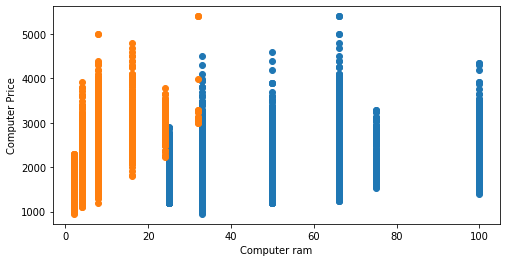

In [12]:
fig, ax = plt.subplots(figsize=(8,4)) #fig and ax are the variables that take on the tuple values from plt.subplots() which contains the figure and axes objects
ax.scatter(computers_data['speed'], computers_data['price']) #creates scatter plot for 'speed' and 'price' values in dataframe
ax.scatter(computers_data['ram'], computers_data['price']) #creates scatter plot for 'ram' and 'price' values in dataframe
ax.set_xlabel('Computer ram') #set x axis to computer ram
ax.set_ylabel('Computer Price') #set y axis to computer price
plt.show() #display figure

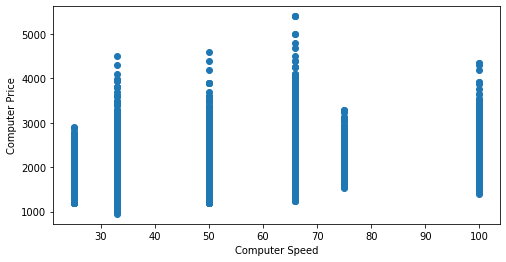

In [13]:
fig, ax = plt.subplots(figsize=(8,4)) #fig and ax are the variables that take on the tuple values from plt.subplots() which contains the figure and axes objects
ax.scatter(computers_data['speed'], computers_data['price']) #draws scatter plot for 'speed' and 'price' values in dataframe
ax.set_xlabel('Computer Speed') #set x axis label to computer speed
ax.set_ylabel('Computer Price') #set y axis label to computer price
plt.show() #display the scatter plot

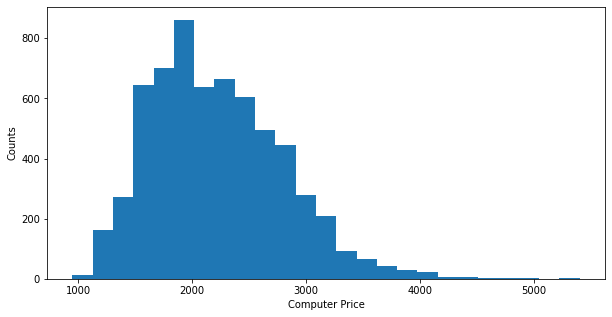

In [14]:
fig, ax = plt.subplots(figsize=(10,5)) #fig and ax are the variables that take on the tuple values from plt.subplots() which contains the figure and axes objects
ax.hist(computers_data['price'],bins=25) #creates histogram and divides data intervals into 25
ax.set_xlabel('Computer Price') # x axis = computer price 
ax.set_ylabel('Counts') # y axis = counts
plt.show() #display figure

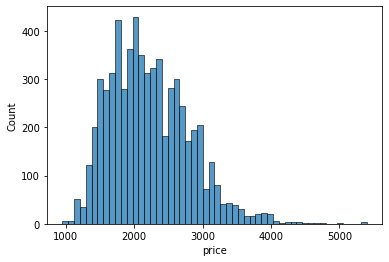

In [15]:
sns.histplot(computers_data.price); #plotting histogram with a density plot

In [16]:
comp_price = computers_data['price'].values.reshape(-1,1) #Outermost will have -1 arrays each with 1 element for price element
comp_price[:10] #display first 10 values
comp_speed = computers_data['speed'].values.reshape(-1,1) #Outermost will have -1 arrays each with 1 element for speed element
comp_speed[:10]
comp_ram = computers_data['ram'].values.reshape(-1,1) #Outermost will have -1 arrays each with 1 element for RAM element
comp_ram
indep_vars = computers_data[['ram','speed']] 
indep_vars #display ram and speed for computer_data

,ram,speed
0,4,25
1,2,33
2,4,25
3,8,25
4,16,33
...,...,...
6254,8,100
6255,16,66
6256,24,100
6257,16,100


In [17]:
train_set,test_set, dep_train, dep_test = train_test_split(indep_vars, comp_price, test_size=0.2, random_state=0)

In [18]:
regressor = LinearRegression()  #setting regressor to apply statistical method for modelling relationships 
regressor.fit(train_set,dep_train) #feed image regressor with training data

LinearRegression()

In [19]:
print(regressor.intercept_) #printing the point of interception crossing y-axis
print(regressor.coef_) #estimate coefficients for linear regression


[1500.97445815]
[[60.20081017  4.23030252]]


In [20]:
predicted = regressor.predict(test_set) #train model to detect patterns using predictive model

In [21]:
Predicted_vs_Actuals = pd.DataFrame({'Actual': dep_test.flatten(), 'Predicted': predicted.flatten()}) #show actual and predicted values
Predicted_vs_Actuals

,Actual,Predicted
0,2090,2122.180923
1,2399,2261.780906
2,2354,2603.787404
3,3495,2261.780906
4,1798,1953.292825
...,...,...
1247,2990,2603.787404
1248,1395,2020.977665
1249,2595,2194.096065
1250,1790,2261.780906


In [22]:
results = OLS(dep_train,train_set).fit() #fit linear regression model
results.summary() #return summarized representation of index

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          2.512e+04
Date:                Mon, 06 Feb 2023   Prob (F-statistic):                        0.00
Time:                        00:00:54   Log-Likelihood:                         -39848.
No. Observations:                5007   AIC:                                  7.970e+04
Df Residuals:                    5005   BIC:                                  7.971e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ram           92.2372      1.676     55.026      0.000      88.951      95.523
speed         24.1873      0.299     80.849      0.000      23.601      24.774
==============================================================================
Omnibus:                      175.901   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.329
Skew:                          -0.448   Prob(JB):                     8.58e-44
Kurtosis:                       3.386   Cond. No.                         9.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

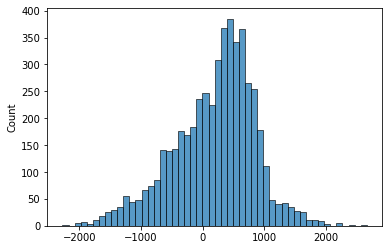

In [23]:
sns.histplot(results.resid); #plot residuals of linear regression in histogram

In [24]:
train_ram,test_ram, train_price, price_test = train_test_split(comp_ram, comp_price, test_size=0.2, random_state=0)
regressor_ram = LinearRegression()  
regressor_ram.fit(train_ram,train_price)


LinearRegression()

In [25]:
print(regressor_ram.intercept_)
print(regressor_ram.coef_)

[1692.10333031]
[[63.83970395]]


In [26]:
predicted_price = regressor_ram.predict(test_ram)

In [27]:
Predicted_price_vs_Actuals = pd.DataFrame({'Actual': price_test.flatten(), 'Predicted': predicted_price.flatten()})
Predicted_price_vs_Actuals

,Actual,Predicted
0,2090,2202.820962
1,2399,2202.820962
2,2354,2713.538594
3,3495,2202.820962
4,1798,1947.462146
...,...,...
1247,2990,2713.538594
1248,1395,1947.462146
1249,2595,2202.820962
1250,1790,2202.820962


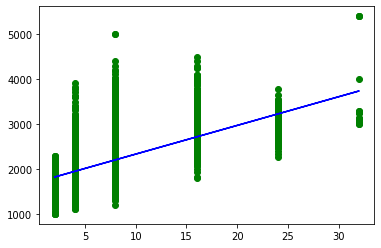

In [28]:
plt.scatter(train_ram, train_price,color='g') #show scatter plot of train_ram, train_price and color='g'
plt.plot(test_ram, predicted_price,color='b') #plot test_ram, predicted_price,color='b'
plt.show() #display figure